# Gini Impurity Index

## 2 Classes

In [1]:
def cal_gini(cls1, cls2):      # number of Class1 and Class2
    total = cls1 + cls2        # sum Class1 and Class2
    gini = 1 - ((cls1/total)**2 + (cls2/total)**2 )
    return gini

In [2]:
# cal_gini(2 , 2)
# cal_gini(3 , 3)
cal_gini(45 , 45)

0.5

In [3]:
# cal_gini(2 , 0)
cal_gini(178 , 0)

0.0

In [4]:
cal_gini(0 , 2)

0.0

In [5]:
cal_gini(3 , 3)
# cal_gini(5 , 5)

0.5

In [6]:
# Class1=3,  Class2=7   (Total=10)
cal_gini(3 , 7)

0.42000000000000004

In [7]:
cal_gini(7 , 3)

0.42000000000000004

In [8]:
# cal_gini(2 , 8)
cal_gini(0 , 10)

0.0

## 3 Classes

In [9]:
def cal_gini3(cls1, cls2, cls3):
    total = cls1 + cls2 + cls3
    gini = 1 - ((cls1/total)**2 + (cls2/total)**2 + (cls3/total)**2)
    return gini

In [10]:
cal_gini3(2, 2, 2)

0.6666666666666667

In [11]:
cal_gini3(0, 1, 2)

0.4444444444444444

In [12]:
cal_gini3(0, 0, 2)

0.0

# Decision Tree : Simple Loan

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [14]:
df = pd.read_csv('data/simple_loan.csv')
df

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no
5,middle,False,n,fair,no
6,middle,False,n,good,no
7,middle,True,y,good,yes
8,middle,False,y,excellent,yes
9,middle,False,y,excellent,yes


In [15]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [16]:
df.target.unique()

array(['no', 'yes'], dtype=object)

In [17]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [18]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [19]:
X = df.drop(['target'], axis=1)
X.head()

,age,employed,own_house,credit
0,young,False,n,fair
1,young,False,n,good
2,young,True,n,good
3,young,True,y,fair
4,young,False,n,fair


In [20]:
y = df.target
y.head()

0     no
1     no
2    yes
3    yes
4     no
Name: target, dtype: object

## Train (Problem)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

## Label Encoding
เข้ารหัส เปลี่ยน ข้อความ -> ตัวเลข
- <b>age</b> : middle, old, young  
middle -> 0 <br>old -> 1   
young -> 2
- <b>own_house</b>:  n -> 0  ,   y -> 1

In [22]:
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [23]:
def labelEncode(data, columns):
    for i in columns:
#         print(i)
        data[i + '_'], _ = pd.factorize(data[i], sort=True)  
    
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)  

# scikit : sklearn.preprocessing.LabelEncoder

In [24]:
df['target_'], class_names = pd.factorize(df.target)
df.sample(5)
df.head()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0


In [25]:
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0
5,middle,False,n,fair,no,0,0,0,1,0
6,middle,False,n,good,no,0,0,0,2,0
7,middle,True,y,good,yes,0,1,1,2,1
8,middle,False,y,excellent,yes,0,0,1,0,1
9,middle,False,y,excellent,yes,0,0,1,0,1


In [26]:
class_names

Index(['no', 'yes'], dtype='object')

In [27]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

In [28]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns] 
X.head()

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


In [29]:
for i in enc_columns:
    print(i[:-1]) 
    print(df[i[:-1]].unique())
    print(df[i].unique())
    print('----')

age
['young' 'middle' 'old']
[2 0 1]
----
employed
[False  True]
[0 1]
----
own_house
['n' 'y']
[0 1]
----
credit
['fair' 'good' 'excellent']
[1 2 0]
----


In [30]:
y = df.target_

## Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20) 

In [32]:
X_train.shape , X_test.shape

((11, 4), (6, 4))

In [33]:
y_train.shape , y_test.shape

((11,), (6,))

In [34]:
X_train
# X_train.head()

,age_,employed_,own_house_,credit_
13,1,1,0,0
0,2,0,0,1
2,2,1,0,2
7,0,1,1,2
6,0,0,0,2
4,2,0,0,1
9,0,0,1,0
15,1,0,0,0
12,1,1,0,2
10,1,0,1,0


In [35]:
y_train

13    1
0     0
2     1
7     1
6     0
4     0
9     1
15    1
12    1
10    1
3     1
Name: target_, dtype: int64

In [36]:
X_test

,age_,employed_,own_house_,credit_
16,2,1,1,1
1,2,0,0,2
5,0,0,0,1
11,1,0,1,2
8,0,0,1,0
14,1,0,0,1


In [37]:
y_test

16    1
1     0
5     0
11    1
8     1
14    0
Name: target_, dtype: int64

## Train

In [38]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()

model = DecisionTreeClassifier(max_depth=1)
# model = DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [39]:
score = model.score(X_test, y_test)
print('Score =', score.round(3))

Score = 0.667


In [40]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(3))

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Score -> 0.667
Accuracy Score:  0.667
              precision    recall  f1-score   support

          no       0.60      1.00      0.75         3
         yes       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

[[3 0]
 [2 1]]


In [41]:
print(np.array(y_test), '<- y_test (Actual or True data)')
print(y_pred, '<- y_predicted from the model')

[1 0 0 1 1 0] <- y_test (Actual or True data)
[1 0 0 0 0 0] <- y_predicted from the model


In [42]:
for i in y_pred: # แสดงชื่อ Label แทน 0 1
    print(class_names[i])

yes
no
no
no
no
no


## Evaluation

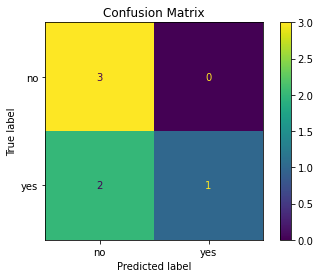

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = class_names    #

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('Confusion Matrix')
plt.show()

In [44]:
model.feature_importances_

array([0., 1., 0., 0.])

## Predict

In [45]:
for i in enc_columns:
    print(i[:-1]) 
    print(df[i[:-1]].unique())
    print(df[i].unique())
    print('----')

age
['young' 'middle' 'old']
[2 0 1]
----
employed
[False  True]
[0 1]
----
own_house
['n' 'y']
[0 1]
----
credit
['fair' 'good' 'excellent']
[1 2 0]
----


In [46]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_predict = model.predict(X_input)
print(y_predict)

for i in y_predict:
    print('Result : {}'. format(class_names[i]))

[1 0 1 0]
Result : yes
Result : no
Result : yes
Result : no


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualize model

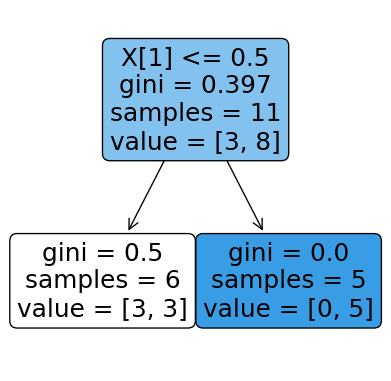

In [47]:
from sklearn.tree import plot_tree

plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=96)
# plt.figure(figsize=(6,6))

plot_tree(model, filled=True, rounded=True)

plt.show()

In [48]:
enc_columns

['age_', 'employed_', 'own_house_', 'credit_']

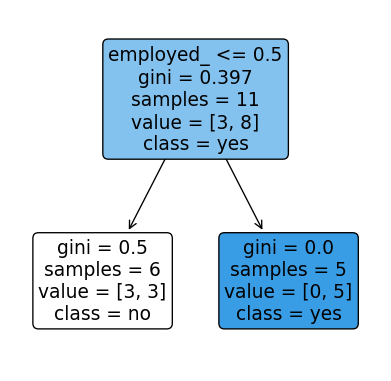

In [49]:
from sklearn.tree import plot_tree

data_feature_names = enc_columns #

plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=96)
plot_tree(model, 
         filled=True, rounded=True,
         feature_names=data_feature_names,  
         class_names=class_names)

plt.show()

In [50]:
cal_gini(3, 8)

0.39669421487603307

In [51]:
pd.concat([X_train, y_train], axis=1, join='inner')

,age_,employed_,own_house_,credit_,target_
13,1,1,0,0,1
0,2,0,0,1,0
2,2,1,0,2,1
7,0,1,1,2,1
6,0,0,0,2,0
4,2,0,0,1,0
9,0,0,1,0,1
15,1,0,0,0,1
12,1,1,0,2,1
10,1,0,1,0,1


## Prediction (CSV input)

In [53]:
df_pred = pd.read_csv('data/simple_loan_predict.csv')
df_pred.head()

,id,name,age,employed,own_house,credit
0,101,Kob,middle,True,y,fair
1,102,Cala,old,False,n,good
2,103,Alex,old,True,n,fair
3,104,Tim,young,False,y,fair
4,105,Joy,middle,False,n,fair


In [54]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df_pred, feature_columns)
df_pred.head()

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,101,Kob,middle,True,y,fair,0,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2
2,103,Alex,old,True,n,fair,1,1,0,1
3,104,Tim,young,False,y,fair,2,0,1,1
4,105,Joy,middle,False,n,fair,0,0,0,1


In [55]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X_input = df_pred[enc_columns] 
X_input.head()

,age_,employed_,own_house_,credit_
0,0,1,1,1
1,1,0,0,2
2,1,1,0,1
3,2,0,1,1
4,0,0,0,1


In [56]:
y_predict = model.predict(X_input)
df_pred['predict'] = y_predict
df_pred

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict
0,101,Kob,middle,True,y,fair,0,1,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2,0
2,103,Alex,old,True,n,fair,1,1,0,1,1
3,104,Tim,young,False,y,fair,2,0,1,1,0
4,105,Joy,middle,False,n,fair,0,0,0,1,0
5,106,Jib,middle,False,y,excellent,0,0,1,0,0


In [57]:
df_pred['result'] = class_names[df_pred.predict]
columns = ['id','name','age','employed','own_house','credit','result']
print('Result...')
df_pred[columns]

Result...


,id,name,age,employed,own_house,credit,result
0,101,Kob,middle,True,y,fair,yes
1,102,Cala,old,False,n,good,no
2,103,Alex,old,True,n,fair,yes
3,104,Tim,young,False,y,fair,no
4,105,Joy,middle,False,n,fair,no
5,106,Jib,middle,False,y,excellent,no


In [58]:
!pip show openpyxl
# !pip install openpyxl

Name: openpyxl
Version: 3.0.9
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: et-xmlfile
Required-by: 


In [59]:
filepath = 'loan_result.xlsx'
writer = pd.ExcelWriter(filepath)
df_pred[columns].to_excel(writer, 'MySheet1', index=False)
writer.save()